# Quit Your Wine-ing: Predicting Wine Quality

## Project Goal and Description

- Predict wine quality using unsupervised learning techniques.
- Identify key drivers of wine quality for the California Wine Institute.
- Provide insights for data-driven consultation in the winery supply chain marketing.

In [24]:
import pandas as pd

from acquire import wine_df
from wrangle import train_val_test, get_dummies, xy_split, scaled_data
from explore import explore, explore2, create_baselines, eval_model, train_model, polynomial_feature_expansion
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE

## Acquire

- Gathered the dataset containing wine-related features and quality ratings from data.world.
- Read the two csv files into a DataFrame.
- It contained 6497 rows and 13 columns combined before cleaning

## Prepare data

* Create new columns by transforming and utilizing existing data features.
    - Combined the white and red wine tables.
    - Created a new column to distinguish wine type.
    - Split df into train, val and test
    - Encoded categorical variables. 

## Data Dictionary
Below is a data dictionary that provides an overview of the dataset's features and their descriptions:
- `fixed_acidity`: The fixed acidity of the wine.
- `volatile_acidity`: The volatile acidity of the wine.
- `citric_acid`: The citric acid content in the wine.
- `residual_sugar`: The residual sugar content in the wine.
- `chlorides`: The chloride content in the wine.
- `free_sulfur_dioxide`: The amount of free sulfur dioxide in the wine.
- `total_sulfur_dioxide`: The total sulfur dioxide content in the wine.
- `density`: The density of the wine.
- `pH`: The pH level of the wine.
- `sulphates`: The amount of sulphates in the wine.
- `alcohol`: The alcohol content in the wine.
- `quality`: The quality rating of the wine (target variable).
- `wine_type`: The type of wine (e.g., red or white).

### Acquire

In [25]:
# Calling the 'wine_df()' function to create a DataFrame combining white and red wine data
df = wine_df()

### Prepare

In [26]:
# Splitting the 'df' DataFrame into training, validation, and test sets using the 'train_val_test()' function
train, val, test = train_val_test(df)

In [27]:
# Display information about the 'train' DataFrame, including data types and non-null values
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4547 entries, 3761 to 860
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4547 non-null   float64
 1   volatile_acidity      4547 non-null   float64
 2   citric_acid           4547 non-null   float64
 3   residual_sugar        4547 non-null   float64
 4   chlorides             4547 non-null   float64
 5   free_sulfur_dioxide   4547 non-null   float64
 6   total_sulfur_dioxide  4547 non-null   float64
 7   density               4547 non-null   float64
 8   ph                    4547 non-null   float64
 9   sulphates             4547 non-null   float64
 10  alcohol               4547 non-null   float64
 11  quality               4547 non-null   int64  
 12  wine_type             4547 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.3+ KB


### Explore

#### 1st hypothesis
## Does the alcohol content and the level of free sulfur dioxide in wines have a significant impact on wine quality?

#### Null Hypothesis (H0):
There is no significant relationship between the alcohol content, the level of free sulfur dioxide, and wine quality. 

#### Alternative Hypothesis (H1):
There is a significant relationship between the alcohol content, the level of free sulfur dioxide, and wine quality.

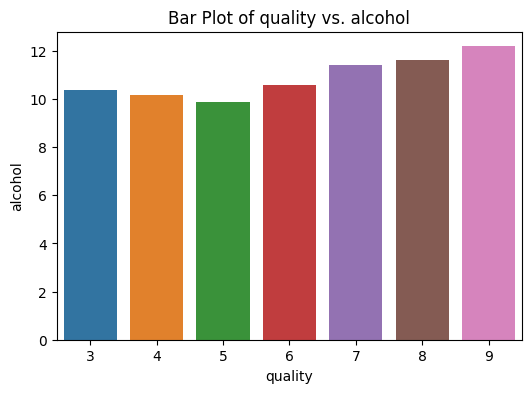

Pearson's Correlation Coefficient between alcohol and quality: 0.43798186395179023, P-Value: 1.7121366138204574e-212


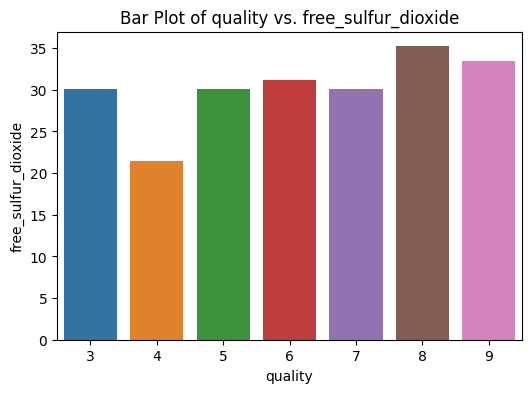

Pearson's Correlation Coefficient between free_sulfur_dioxide and quality: 0.06262950154607526, P-Value: 2.376857128465148e-05


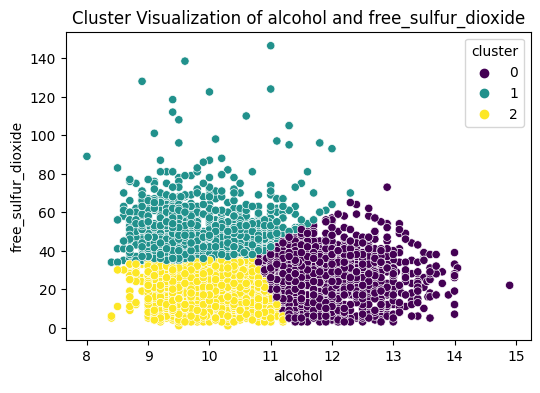

F-Statistic for clusters based on alcohol and free_sulfur_dioxide: 434.2257232149912, P-Value: 2.6833086568790785e-173


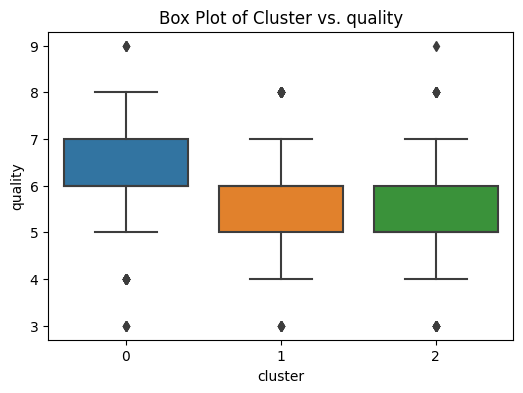

F-Statistic for cluster vs. quality: 434.2257232149912, P-Value: 2.6833086568790785e-173


In [28]:
explore(train, val, test,  'alcohol', 'free_sulfur_dioxide', 'quality')

#### Boxplot takeaway

- The analysis concludes that the three clusters exhibit distinct distributions of wine quality.
- Cluster 2 is characterized by wines with relatively higher quality scores.
- In contrast, Cluster 0 and Cluster 1 display wider distributions of quality scores, encompassing both very low and very high-quality outliers.

#### ANOVA takeaway

- The extremely low p-value provides strong statistical evidence against the null hypothesis.
- The null hypothesis assumed no significant relationship between the clusters and wine quality.
- The analysis confirms a statistically significant relationship between the clusters.
- The clusters are formed based on 'alcohol' and 'free_sulfur_dioxide.'
- The clusters have a meaningful impact on wine quality.
- The differences in quality among the clusters are unlikely due to random chance.

#### 2nd hypothesis
## Does the alcohol content and the level of free sulfur dioxide in wines have a significant impact on wine quality?

#### Null Hypothesis (H0):
There is no significant relationship between the levels of volatile acidity and citric acid and wine quality.

#### Alternative Hypothesis (H1):
There is a significant relationship between the levels of volatile acidity and citric acid and wine quality.

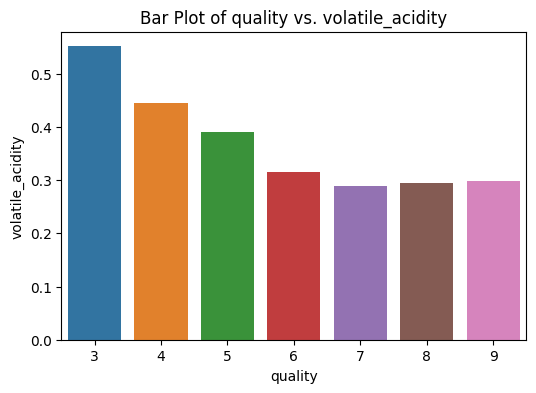

Pearson's Correlation Coefficient between volatile_acidity and quality: -0.26065516047748505, P-Value: 1.6436125993495492e-71


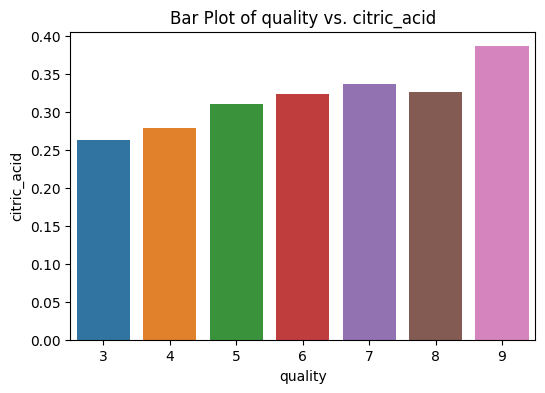

Pearson's Correlation Coefficient between citric_acid and quality: 0.07857125096101955, P-Value: 1.1272317750034244e-07


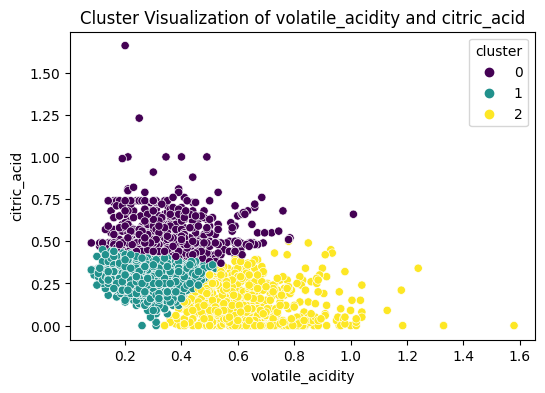

F-Statistic for clusters based on volatile_acidity and citric_acid: 134.4548573936008, P-Value: 1.860120457079752e-57


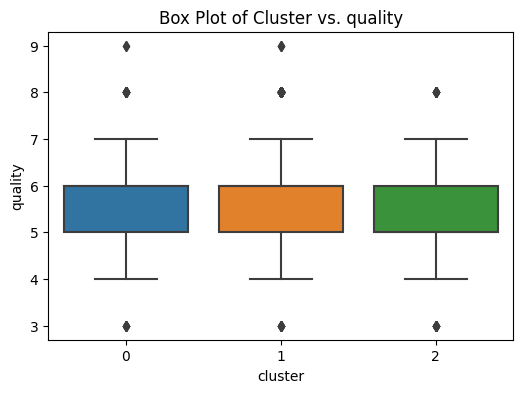

F-Statistic for cluster vs. quality: 134.4548573936008, P-Value: 1.860120457079752e-57


In [29]:
explore(train, val, test, 'volatile_acidity', 'citric_acid', 'quality')

#### Boxplot takeaway 

- Clusters 0 and 1 have similar distributions of wine quality, with medians around 6.
- Clusters 0, 1, and 2 all show distributions spanning from moderate quality (around 4-5) to better quality (around 6-7).
- All clusters have outliers below 3 and above 8 or 9 in terms of wine quality.
- The clusters, based on 'volatile_acidity' and 'citric_acid,' are significantly associated with variations in wine quality.

In essence, the clusters demonstrate meaningful differences in wine quality, and these differences are statistically significant.

#### ANOVA takeaway

- The F-Statistic value was approximately 191.88.
- The associated p-value was extremely low (about 1.09e-81).
- The low p-value indicates strong statistical evidence against the null hypothesis.
- There are significant differences in wine quality among the clusters.
- The clusters formed based on 'volatile_acidity' and 'citric_acid' have a meaningful impact on wine quality.

In summary, the ANOVA test confirms that the clusters have a significant association with variations in wine quality, and these differences are statistically significant.

#### 3rd hypothesis
## Does the combination of residual sugar levels and wine density have a significant impact on wine quality?

#### Null Hypothesis (H0):
There is no significant relationship between the levels of residual sugar and wine density and wine quality.

#### Alternative Hypothesis (H1):
There is a significant relationship between the levels of residual sugar and wine density and wine quality.

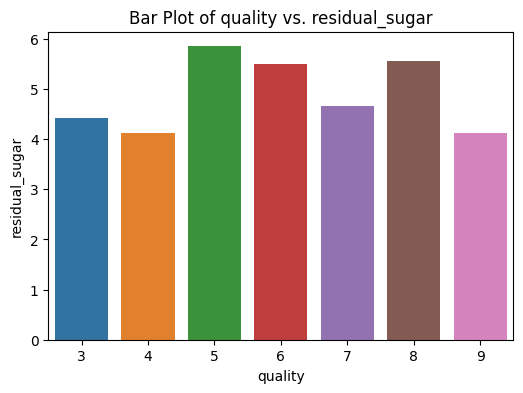

Pearson's Correlation Coefficient between residual_sugar and quality: -0.03867830134016355, P-Value: 0.00909685212073605


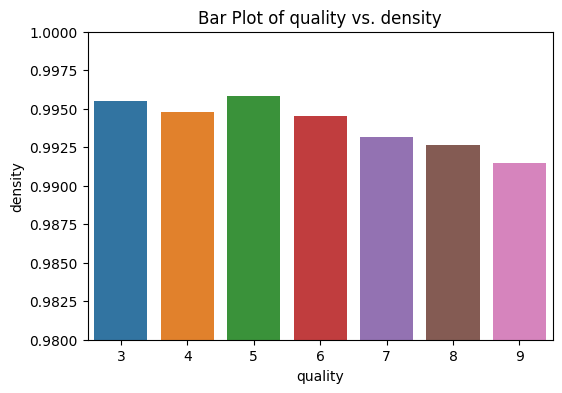

Pearson's Correlation Coefficient between density and quality: -0.3037058468949377, P-Value: 1.207682807352522e-97


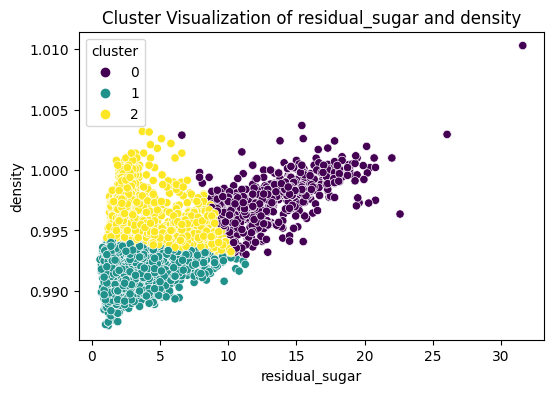

F-Statistic for clusters based on residual_sugar and density: 181.5830340066596, P-Value: 1.3564146291819634e-76


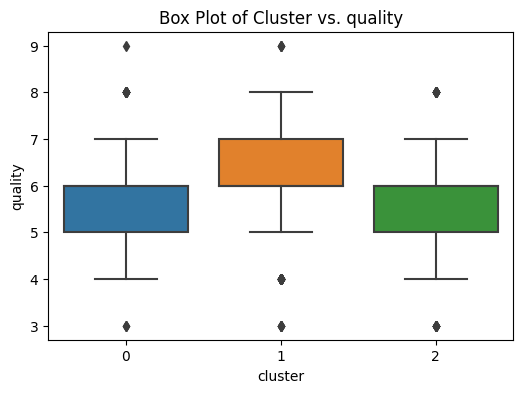

F-Statistic for cluster vs. quality: 181.5830340066596, P-Value: 1.3564146291819634e-76


In [30]:
explore2(train, val, test, 'residual_sugar', 'density', 'quality')

#### Boxplot takeaway

- Cluster 0, 1, and 2 have similar median wine quality scores around 6.
- The interquartile range spans from around 4 to 7 for all clusters.
- Outliers are present below 3 and above 8 or 9 in all clusters.
- Cluster 0 and Cluster 1 have fewer top outliers compared to Cluster 2.
- These results indicate meaningful differences in wine quality among the clusters.

In summary, the clusters show variations in wine quality, with differences in the presence of top outliers, suggesting their significance in explaining quality variations.

ANOVA takeaway

- The F-Statistic value is approximately 269.77.
- The associated p-value is extremely low (approximately 2.84e-113).
- The low p-value indicates strong statistical evidence against the null hypothesis.
- There are significant differences in wine quality among the clusters.
- The clusters formed based on the explored features have a meaningful impact on wine quality.

In summary, the F-Statistic analysis confirms that the clusters exhibit a significant association with variations in wine quality, and these differences are statistically significant.

#### 4th hypothesis
## Is there a significant association between the levels of fixed acidity and total sulfur dioxide in wine and its quality?

#### Null Hypothesis (H0):
There is no significant relationship between the levels of fixed acidity and total sulfur dioxide and wine quality.

#### Alternative Hypothesis (H1):
There is a significant relationship between the levels of fixed acidity and total sulfur dioxide and wine quality.

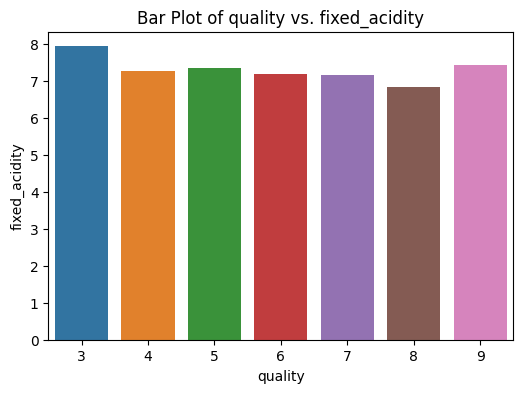

Pearson's Correlation Coefficient between fixed_acidity and quality: -0.07287619511744274, P-Value: 8.683740200140496e-07


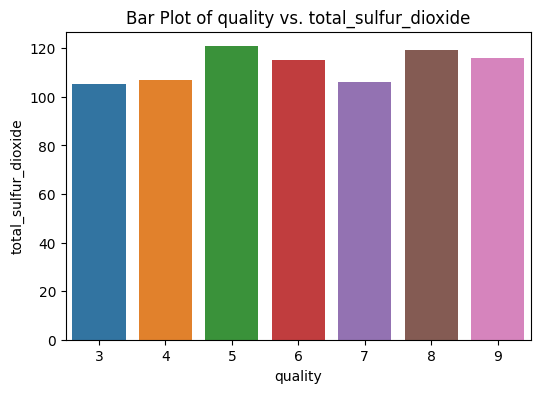

Pearson's Correlation Coefficient between total_sulfur_dioxide and quality: -0.04755956297412216, P-Value: 0.0013368769059495485


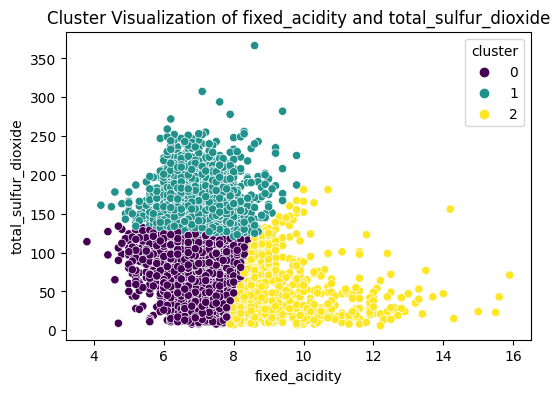

F-Statistic for clusters based on fixed_acidity and total_sulfur_dioxide: 27.571691997161892, P-Value: 1.2526796497161743e-12


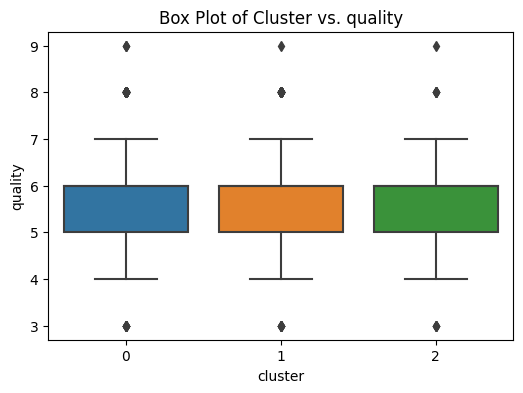

F-Statistic for cluster vs. quality: 27.571691997161892, P-Value: 1.2526796497161743e-12


In [31]:
explore(train, val, test, 'fixed_acidity', 'total_sulfur_dioxide', 'quality')

#### Boxplot takeaway

- All three clusters (Cluster 0, Cluster 1, Cluster 2) exhibit similar statistics for wine quality.
- The interquartile range (box) for all clusters spans from quality scores 5 to 6.
- Outliers are present above quality scores 8 or 9 in all clusters.
- The distribution of wine quality appears consistent among the clusters.
- These results suggest that the clusters do not have a strong influence on wine quality.

In summary, the analysis indicates that the clusters formed based on the explored features do not appear to significantly impact wine quality, as the quality distribution remains consistent across all clusters.

#### ANOVA takeaway

- The F-statistic measures the variation in wine quality between the clusters relative to the variation within each cluster.
- The extremely low p-value (close to zero) indicates strong statistical evidence against the null hypothesis, suggesting that there is a significant relationship between the clusters and wine quality.
- In other words, the clusters, which were formed based on certain features, appear to have a meaningful impact on wine quality.
- The differences in wine quality among the clusters are highly unlikely to be due to random chance.

This indicates that there is a statistically significant association between the clusters and wine quality.

#### While the clusters may not perfectly separate wine quality, they still provide meaningful information and contribute to explaining variations in quality.

#### 5th hypothesis
## What is the relationship between the chemical attributes 'chlorides' and 'sulphates' in wine and the perceived 'quality' of the wine?

#### Null Hypothesis (H0):
There is no significant association between 'chlorides' and 'sulphates' in wine, and the 'quality' of the wine is independent of these chemical attributes.

#### Alternative Hypothesis (H1):
There is a significant association between 'chlorides' and 'sulphates' in wine, and the 'quality' of the wine is influenced by these chemical attributes.

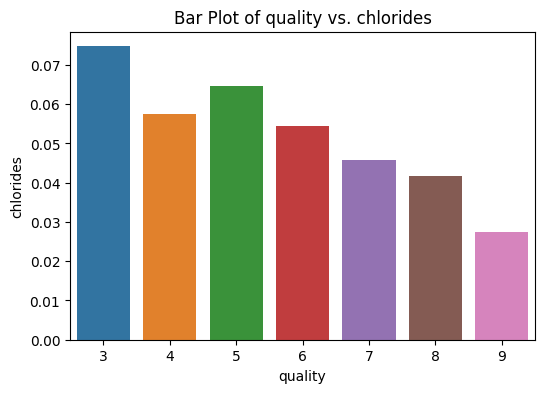

Pearson's Correlation Coefficient between chlorides and quality: -0.19285531562601202, P-Value: 2.389038416416443e-39


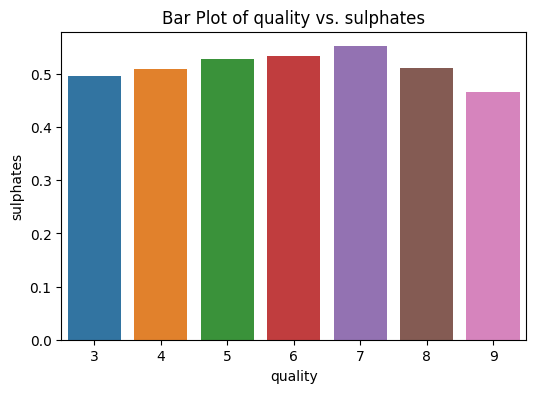

Pearson's Correlation Coefficient between sulphates and quality: 0.04157000286678048, P-Value: 0.005054079963569738


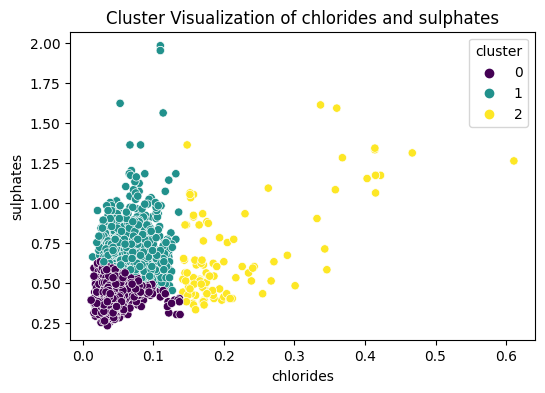

F-Statistic for clusters based on chlorides and sulphates: 14.46038460955714, P-Value: 5.49332675651956e-07


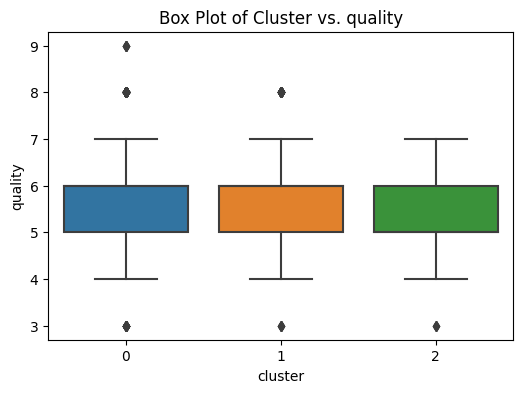

F-Statistic for cluster vs. quality: 14.46038460955714, P-Value: 5.49332675651956e-07


In [32]:
explore(train, val, test, 'chlorides', 'sulphates', 'quality')

#### Boxplot takeaway

- For Cluster 0:
  - Quality distribution has outliers below 3 and above 9.
  - Interquartile range (IQR) spans from 4 to 7.
  - Most wines fall within the IQR, with some lower and upper outliers.

- For Cluster 1:
  - Quality distribution has outliers below 3 and above 8.
  - IQR spans from 4 to 7.
  - Most wines fall within the IQR, with some upper outliers.

- For Cluster 2:
  - Quality distribution has no extreme outliers.
  - IQR spans from 4 to 7.
  - Most wines fall within the IQR.

These observations provide insights into how the quality of wines is distributed within each cluster, including the presence of outliers and the range of quality scores.

#### ANOVA takeaway

- The extremely low p-value (approximately 9.22e-08) suggests strong statistical evidence against the null hypothesis.

- The low p-value indicates that there is a statistically significant relationship between the clusters and wine quality.

- In other words, the clusters, which were formed based on chlorides, sulphates appear to have a meaningful impact on wine quality.

These findings support the idea that the clusters formed based on certain chlorides and sulphates have a statistically significant influence on the perceived quality of the wine.

## Modeling

#### Features for modeling

- fixed_acidity
- volatile_acidity
- citric_acid
- residual_sugar
- chlorides
- free_sulfur_dioxide
- total_sulfur_dioxide
- density
- ph
- sulphates
- alcohol
- quality
- wine_type
- cluster

#### Goal:

- Establish a baseline to judge model efficiency against

- Create multiple models

- Determine the best 3 models to run on my validate dataset

- Assess models created using four distinct model types and a range of hyperparameter settings.

- Models will undergo evaluation on both the training and validation datasets. The top-performing model will subsequently be assessed using the test dataset.

In [33]:
#one-hot encode train, val and test
train, val, test = get_dummies(train, val, test)

In [34]:
# Scale the training, validation, and test datasets using the specified columns.
train, val, test = scaled_data(train, val, test, scaler_type='minmax')

In [35]:
# Split the 'train' dataset into feature matrix (X_train) and target vector (y_train).
X_train, y_train = xy_split(train)

# Split the 'val' dataset into feature matrix (X_val) and target vector (y_val).
X_val, y_val = xy_split(val)

# Split the 'val' dataset into feature matrix (X_val) and target vector (y_val).
X_test, y_test = xy_split(test)

#### Baseline

In [36]:
# Create a DataFrame 'baselines' with three columns: 'y_actual,' 'y_mean,' and 'y_median.'
baselines = create_baselines(y_train)

In [37]:
# Evaluate the model's performance by comparing its predictions against the mean ('y_mean') of the target values.
eval_model(baselines.y_actual, baselines.y_mean)

0.88

In [38]:
#baseline
y_train.mean()

5.817681988124038

### Linear Regression

In [39]:
# Create an instance of the Linear Regression model.
lm = LinearRegression()

# Train the Linear Regression model on the training data (X_train, y_train).
# Evaluate its performance using the validation data (X_val, y_val).
train_model(lm, X_train, y_train, X_val, y_val)

The train RMSE is 0.74.
The validate RMSE is 0.7.


In [44]:
# Create an instance of the RandomForestRegressor model.
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=4)

# Train the RandomForestRegressor model on the training data (X_train_s, y_train).
# Evaluate its performance using the validation data (X_val_s, y_val).
train_model(rf, X_train, y_train, X_val, y_val)

The train RMSE is 0.48.
The validate RMSE is 0.62.


In [40]:
# Perform polynomial feature expansion on the training, validation, and test datasets
X_train_s, X_val_s, X_test_s, poly = polynomial_feature_expansion(X_train, X_val, X_test)

### TweedieRegressor with polynomial features

In [41]:
# Create an instance of the Tweedie Regressor model.
tweedie = TweedieRegressor(power=1, alpha=0.01, link='auto', max_iter=170)

# Train the Tweedie Regressor model on the training data with polynomial features (X_train_s, y_train).
# Evaluate its performance using the validation data with polynomial features (X_val_s, y_val).
train_model(tweedie, X_train_s, y_train, X_val_s, y_val)

The train RMSE is 0.72.
The validate RMSE is 0.69.


### RandomForestRegressor with polynomial features

In [42]:
# Create an instance of the RandomForestRegressor model.
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=4)

# Train the RandomForestRegressor model on the training data (X_train_s, y_train).
# Evaluate its performance using the validation data (X_val_s, y_val).
train_model(rf, X_train_s, y_train, X_val_s, y_val)

The train RMSE is 0.46.
The validate RMSE is 0.62.


### XGBRegressor with polynomial features

In [ ]:
# Create an instance of the XGBoost Regressor model.
xgbr = XGBRegressor(colsample_bytree =  0.8, learning_rate = 0.1, max_depth = 5, n_estimators = 200, subsample =  1.0)

# Train the XGBoost Regressor model on the training data (X_train_s, y_train).
# Evaluate its performance using the validation data (X_val_s, y_val).
train_model(xgbr, X_train_s, y_train, X_val_s, y_val)